In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 30

idxLength = 28
idxGain = 29

In [16]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

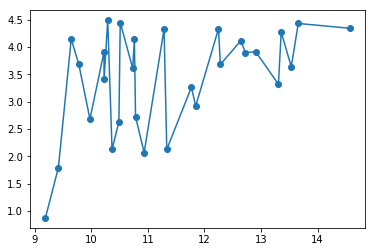

[1.        0.8742868 1.794816  4.144367  3.686135  2.682449  3.908451
 3.412027  4.487949  2.126538  2.63013   4.446302  3.60881   4.142365
 2.723984  2.06878   4.326571  2.126538  3.263076  2.920259  4.330268
 3.679359  4.115559  3.892318  3.915761  3.318403  4.270715  3.640358
 4.429092  4.341281 ]
[-1.        9.190107  9.419612  9.646115  9.779037  9.977058 10.22509
 10.22628  10.29108  10.3673   10.48832  10.51232  10.7325   10.76218
 10.7827   10.93448  11.28647  11.33432  11.77004  11.84588  12.24797
 12.28139  12.64351  12.72425  12.90317  13.30725  13.35654  13.53387
 13.65815  14.5681  ]
Optimal lenght:  4.136910333333334


In [17]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)